### 评论数据分析
根据三个商品所在店铺的评论信息，进行对比，选出商品。

#### 准备工作

In [2]:
#导包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 文件读取
from pyecharts.render import make_snapshot

tags = pd.read_csv('标签数据.csv')
tags.columns = ["商店名", "标签信息"]

olay = pd.read_csv("玉兰油（OLAY）大红瓶面霜50g.csv")
olay.columns=['time', 'order','start', 'commit']

curel = pd.read_csv("珂润（Curel）润浸保湿滋养乳霜40g.csv")
curel.columns=['time', 'order','start' ,'commit']

kiehls = pd.read_csv("科颜氏（Kiehl's）高保湿面霜50ml.csv")
kiehls.columns=['time', 'order','start' ,'commit']

#### 标签数据分析
根据商品名将个商品的数据筛选出来，在通过截取将各标签分解位名称、数据


In [9]:
olaytag = tags[(tags['商店名'].isin (['玉兰油（OLAY）大红瓶面霜50g']))]
cureltag = tags[(tags['商店名'].isin (['珂润（Curel）润浸保湿滋养乳霜40g']))]
kiehlstag = tags[(tags['商店名'].isin (['科颜氏（Kiehl\'s）高保湿面霜50ml']))]

先将格式转成一大段字符串，再使用正则表达式进行匹配，得到两个列表，刚好可以用来进行数据可视化呈现。
`([\u4e00-\u9fa5]+)`匹配中文汉字，`(\d+)`匹配出数字

In [10]:
import re
olaytagstr = " ".join(olaytag['标签信息'])
olaytagname = re.findall("([\u4e00-\u9fa5]+)",olaytagstr)
olaytagnumber = re.findall("(\d+)",olaytagstr)

cureltagstr = " ".join(cureltag['标签信息'])
cureltagname = re.findall("([\u4e00-\u9fa5]+)",cureltagstr)
cureltagnumber = re.findall("(\d+)",cureltagstr)

kiehlstagstr = " ".join(kiehlstag['标签信息'])
kiehlstagname = re.findall("([\u4e00-\u9fa5]+)",kiehlstagstr)
kiehlstagnumber = re.findall("(\d+)",kiehlstagstr)

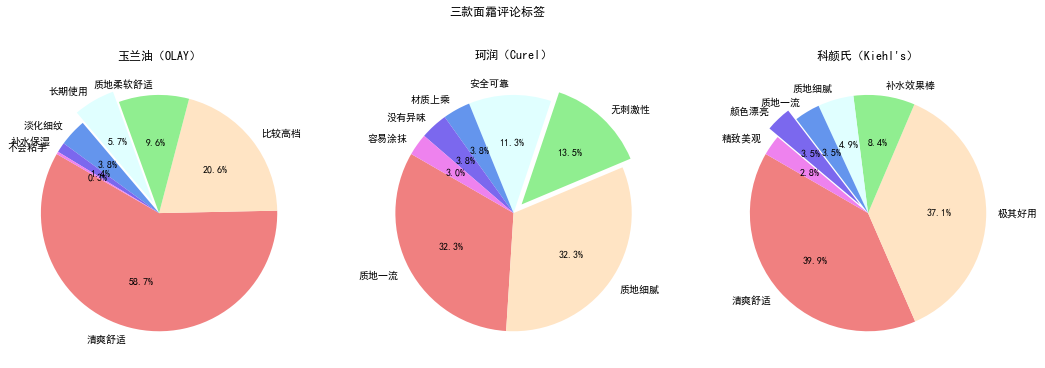

In [11]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
fig,ax= plt.subplots(1,3,figsize =(18,6))
colors = ['lightcoral', 'bisque', 'lightgreen', 'lightcyan', 'cornflowerblue','mediumslateblue','violet']

labels = olaytagname[:-5]
sizes = olaytagnumber[:-5]
explode = (0,0,0,0.1,0,0,0)
ax[0].pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=False,startangle=150)
ax[0].set_title("玉兰油（OLAY）")

labels = cureltagname[:-5]
sizes = cureltagnumber[:-5]
explode = (0,0,0.1,0,0,0,0)
ax[1].pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=False,startangle=150)
ax[1].set_title("珂润（Curel）")

labels = kiehlstagname[:-4]
sizes = kiehlstagnumber[:-4]
explode = (0,0,0,0,0,0.1,0)
ax[2].pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=False,startangle=150)
ax[2].set_title("科颜氏（Kiehl\'s）")

fig.suptitle('三款面霜评论标签')
plt.show()

#### 三商品中共有标签分析
列表推导式求的两个列表的交集，返现没有返回值，后发现确实没有交集

In [12]:
totalabel = [j for j in olaytagname if (j in cureltagname and j in kiehlstagname)]

#### 星级分析
将个商品的星级提出出来并使用正则表达式`\d`直接匹配出数字列表，再通过collections的Counter函数转成字典，进而绘图

In [13]:
import collections

olaystartinfo = " ".join(olay['start'])
olaystart = re.findall("(\d)",olaystartinfo)
olaystartdict = collections.Counter(olaystart)

curelstartinfo = "".join(curel['start'])
curelstart = re.findall("(\d)",curelstartinfo)
curelstartdict = collections.Counter(curelstart)

kiehlsstartinfo = " ".join(kiehls['start'])
kiehlsstart = re.findall("(\d)",kiehlsstartinfo)
kiehlsstartdict = collections.Counter(kiehlsstart)

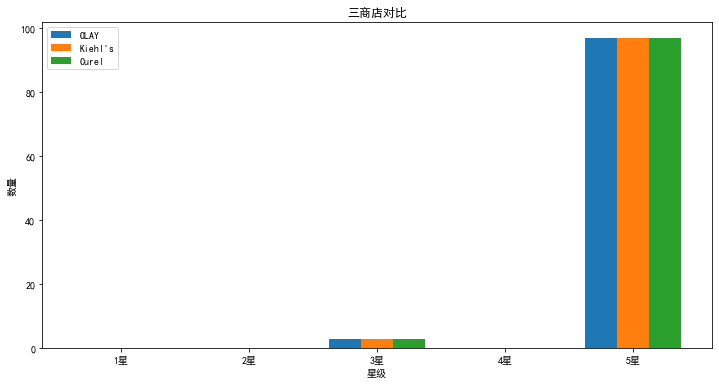

In [46]:
olayy = [olaystartdict[f'{i}'] for i in range(1,6)]
kiehlsy = [kiehlsstartdict[f'{i}'] for i in range(1,6)]
curely = [curelstartdict[f'{i}'] for i in range(1,6)]


# 三组数据
plt.figure(figsize=(12, 6))
labels = ['1星','2星','3星','4星','5星']
x = np.arange(len(labels))# x轴刻度标签位置
width = 0.25  # 柱子的宽度
# 计算每个柱子在x轴上的位置，保证x轴刻度标签居中
# x - width，x， x + width即每组数据在x轴上的位置
plt.bar(x - width, olayy, width, label='OLAY')
plt.bar(x, kiehlsy, width, label='Kiehl\'s')
plt.bar(x + width, curely, width, label='Curel')
plt.xlabel('星级')
plt.ylabel('数量')
plt.title('三商店对比')
plt.xticks(x, labels=labels)
plt.legend()
plt.show()

#### 评论词云图
本次使用pyecharts词云图，使用jieba分词
本次生成词云图用时较长，需要慢慢等待，但结果是好的

In [10]:
import jieba  # 中文字典用于分词
import collections
import pyecharts.options as opts
from pyecharts.charts import WordCloud


def creatWordCloud(df,name):
    words = []
    commits = df['commit']
    for commit in commits:
        word = jieba.lcut_for_search(commit)
        word = [i for i in word if len(i)>1]
        words +=word

    wordict = collections.Counter(words)
    # 提取处前200出现词语生成词云图
    data = wordict.most_common(400)

    w = (
        WordCloud()
        .add(series_name=f"{name}词云图", data_pair=data, word_size_range=[6, 66])
        .set_global_opts(
            title_opts=opts.TitleOpts(
                title=f"{name}词云图", title_textstyle_opts=opts.TextStyleOpts(font_size=23)
            ),
            tooltip_opts=opts.TooltipOpts(is_show=True),
        )

    )
    w.render(f"{name}词云图.html")

creatWordCloud(olay,"OLAY")
creatWordCloud(olay,"Curel")
creatWordCloud(kiehls,"Kiehl\'s")

